## Goal of notebook

This notebook accompanies [sSVN](https://github.com/leviyevalex/sSVN), and provides an example of how to run on the hybrid Rosenbrock. The hybrid Rosenbrock is a very convenient benchmark.
1. It is easily adapted to any number of dimensions $D \ge 2$.
2. Each marginal is a long and narrow ridge. These are notoriously difficult for sampling algorithms to resolve.
3. It may be analytically sampled, providing a computationally trivial way to compare the quality of samples obtained via various methods/algorithms.
4. Most importantly, it closely resembles many geometries often encountered in practice (e.g, https://arxiv.org/abs/2106.15163).

In this notebook we compare the performance of SVGD and sSVN on a ten-dimensional hybrid Rosenbrock. We encourage the reader to tinker with the settings of the hybrid Rosenbrock, `eps`, and `nParticles`. The reader will find that sSVN is much more stable than sSVGD. That is, sSVN may be evolved with a much larger `eps`.

## Import tools

In [1]:
import sys
sys.path.append("..")

from models.JAXHRD import hybrid_rosenbrock
from models.multivariate_gaussian import multivariate_gaussian
from src.samplers import samplers
from scripts.plot_helper_functions import collect_samples
import numpy as np
%matplotlib inline
import logging
import sys
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
import corner
from jax import random
import jax.numpy as jnp


## Setup hybrid Rosenbrock model

In [2]:
# Hybrid Rosenbrock
n2 = 3
n1 = 4
DoF = n2 * (n1 - 1) + 1
B = np.zeros(DoF)
B[0] = 30
B[1:] = 20
mu=1
model = hybrid_rosenbrock(n2, n1, mu, B)
bounded_iid_samples = np.load('rosenbrock_iid_bounded_samples.npy')
# Load iid samples
# try:
#     bounded_iid_samples = np.load('rosenbrock_iid_bounded_samples.npy')
# except:
#     np.random.seed(2)
#     ground_truth_samples = model.newDrawFromPosterior(50000000)
#     truth_table = ((ground_truth_samples > model.lower_bound) & (ground_truth_samples < model.upper_bound))
#     idx = np.where(np.all(truth_table, axis=1))[0]
#     print('%i samples obtained from rejection sampling' % idx.shape[0])
#     bounded_iid_samples = ground_truth_samples[idx]

In [7]:
nParticles = 10
nIterations = 2000
kernelKwargs = {'h':model.DoF / 10, 'p':1.} # Lp
sampler1 = samplers(model=model, nIterations=nIterations, nParticles=nParticles, profile=False, kernel_type='Lp')
sampler1.apply(method='reparam_sSVN', eps=1, kernelKwargs=kernelKwargs)

Stepsize 1.000000 | Median bandwidth: 0.043482: 100%|██████████| 2000/2000 [03:03<00:00, 10.89it/s]


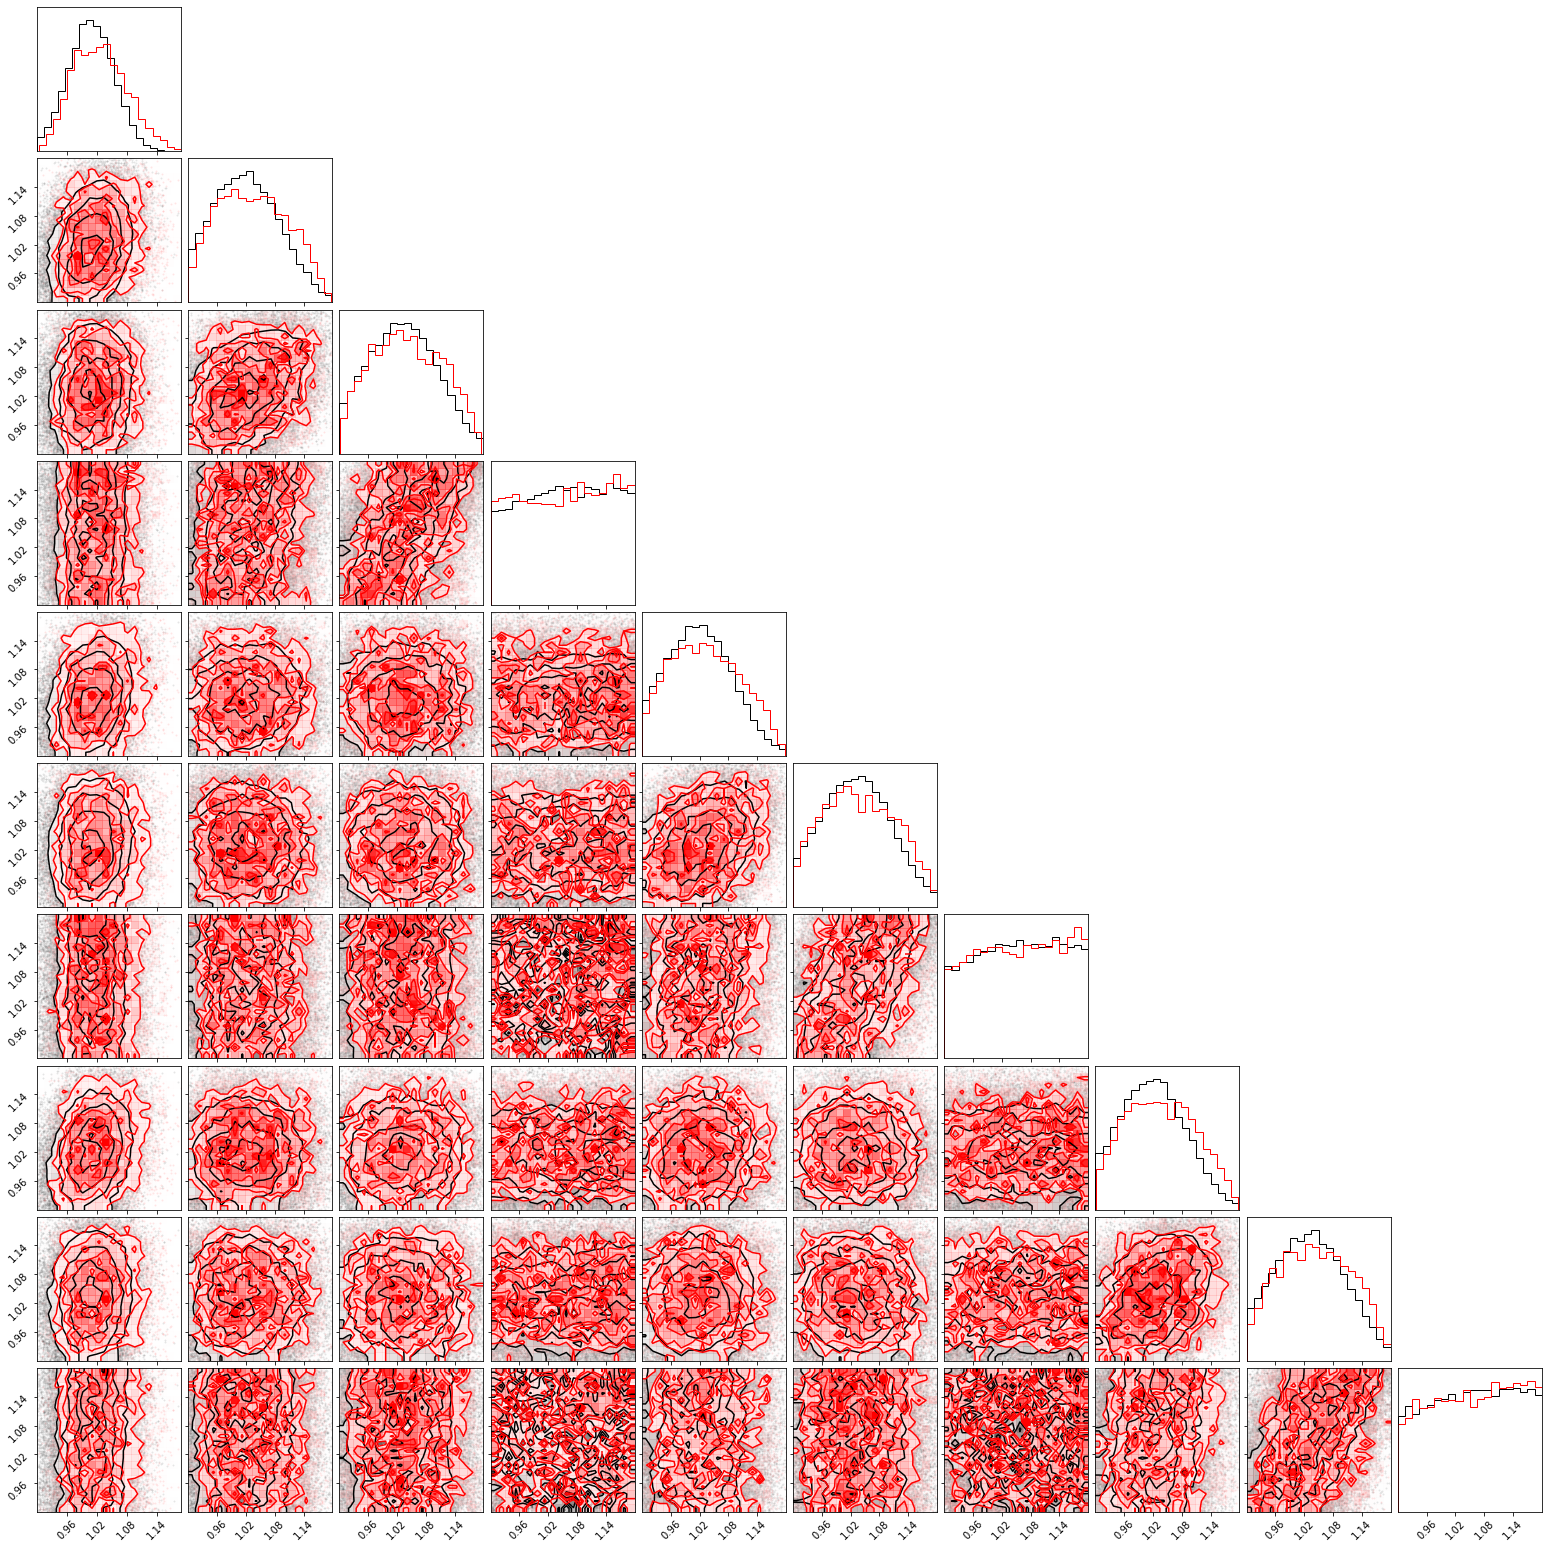

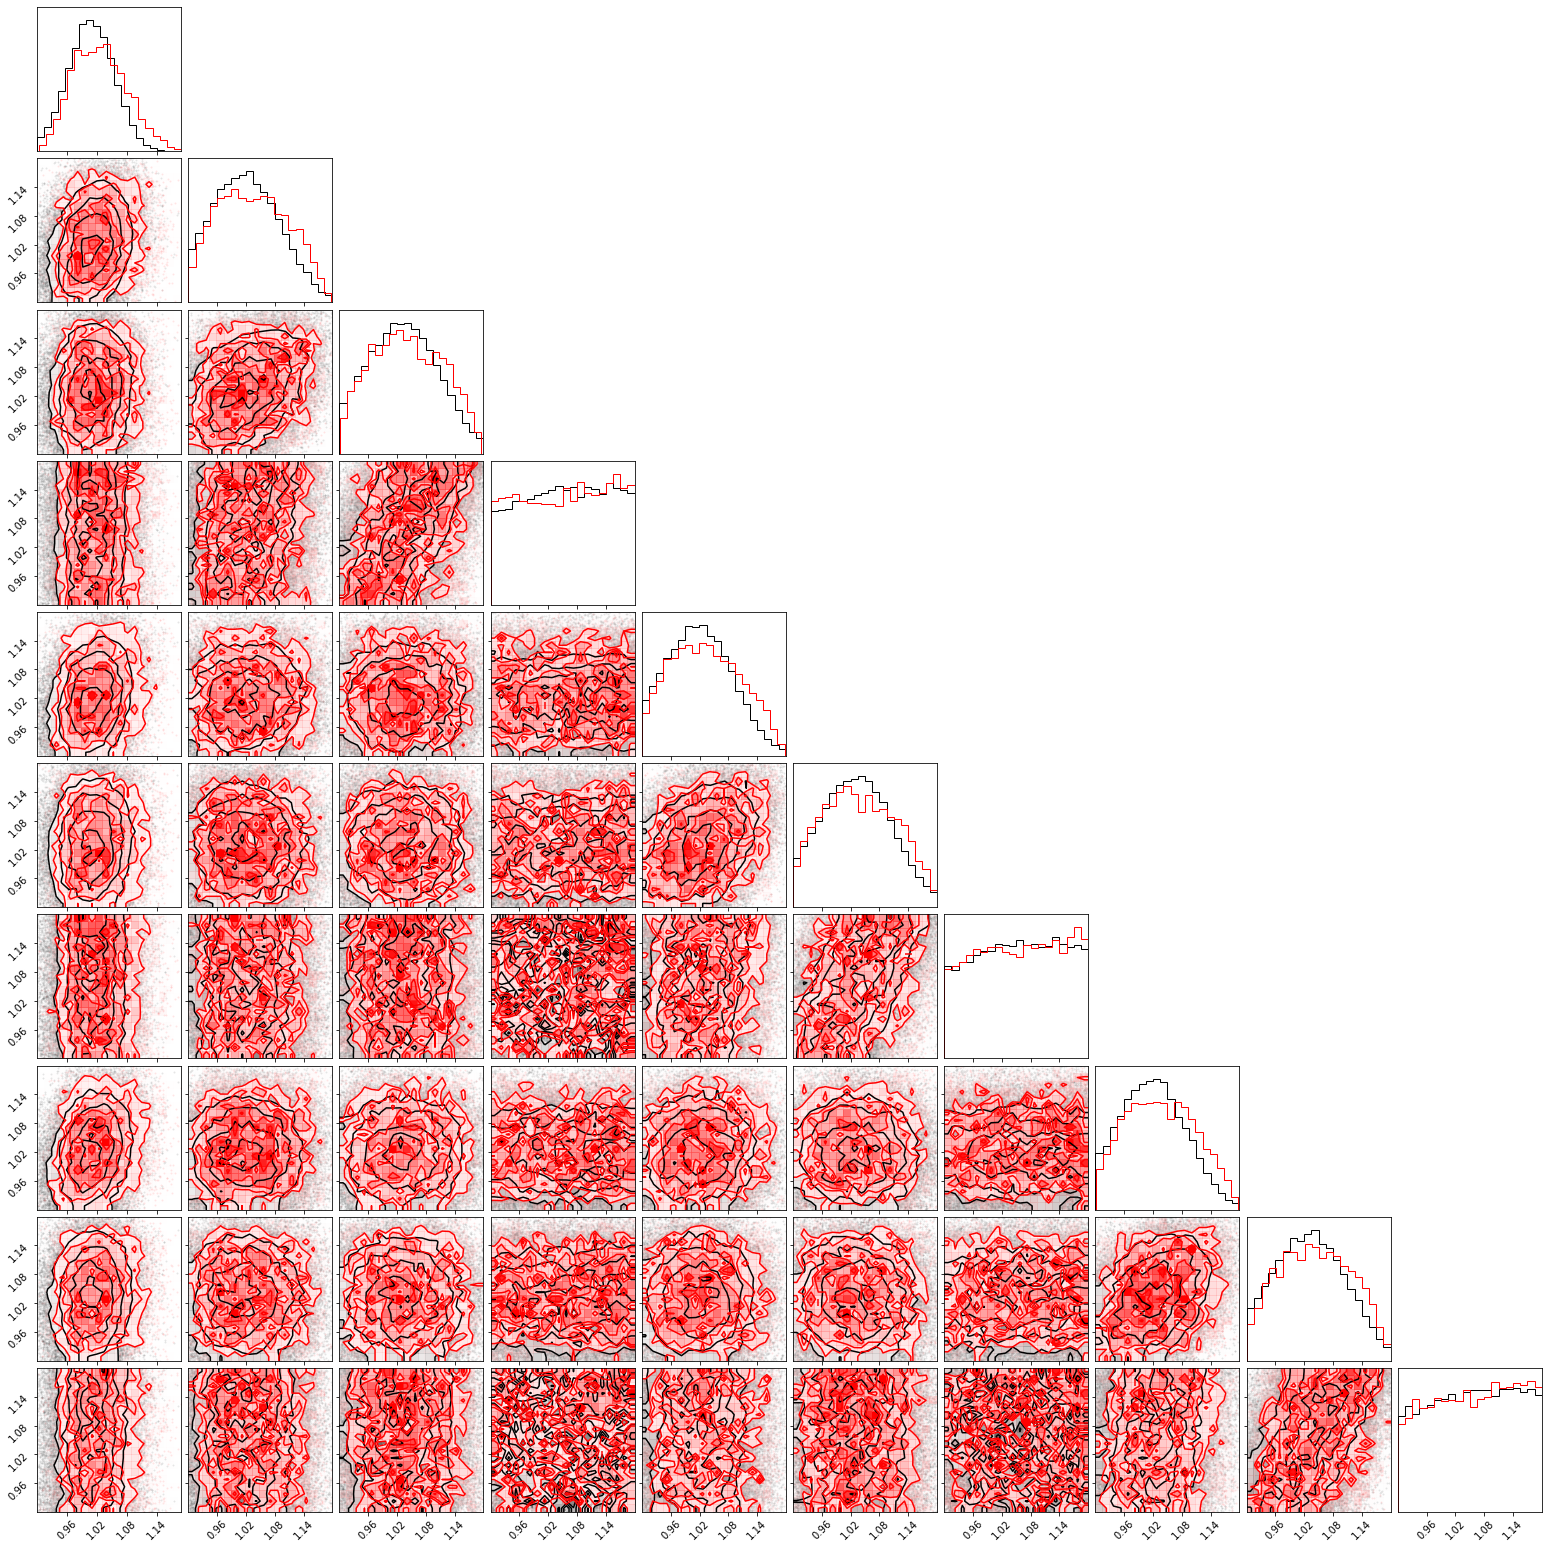

In [8]:
# %%capture
X1 = collect_samples(sampler1.history_path)
fig1 = corner.corner(bounded_iid_samples[0:30000], hist_kwargs={'density':True})
corner.corner(X1, color='r', fig=fig1, hist_kwargs={'density':True})

# Scratchwork

In [ ]:
v = np.array([5, 3, 2, -1])
np.all(v > 0)